### Ch15 Figure1

In [1]:
# They gave out customer coupons and had a one-day sales event. At the end of the month the data analyst ran a report that showed a 10% increase in sales.

coupon_code = ['xmas70', 'happynewyear60', 'coupon80', 'freeshipping', 'family75', 'None']
discount = {'xmas70': .7, 'happynewyear60': .6, 'coupon80': .8, 'freeshipping': 1, 'family75': .75, 'None': 1}

data = []

for i in range(1000):
    
    sku = rd.randint(0,15)
    quantity = rd.randint(1,3)
    coupon = coupon_code[rd.randint(0, len(coupon_code)-1)]
    disc = discount[coupon]
    if coupon != '':
        if rd.random() <= .7:
            quantity = quantity + 2
            
    data.append([i, coupon, disc, sku, quantity])

df = pd.DataFrame(data, columns=['id', 'coupon_code', 'discount', 'sku', 'quantity'])
# df.to_csv('csv_output/ch15_fig1.csv', index=False)
df = pd.read_csv('csv_output/ch15_fig1.csv')
df.head()

,id,coupon_code,discount,sku,quantity
0,0,None,1.0,9,3
1,1,coupon80,0.8,9,2
2,2,xmas70,0.7,1,3
3,3,coupon80,0.8,14,3
4,4,None,1.0,4,4


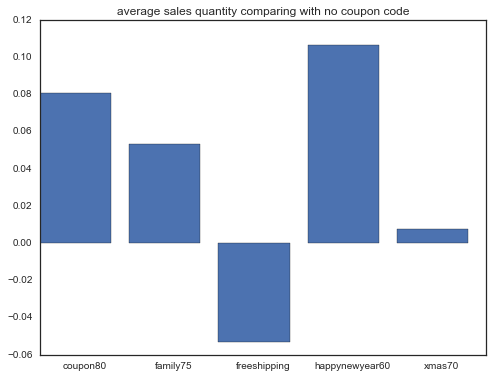

In [1]:
df = pd.read_csv('csv_output/ch15_fig1.csv')

%matplotlib inline
sns.set_style("white")

f, ax = plt.subplots(1, figsize=(8,6))


pvt = df.pivot_table(index='sku', columns='coupon_code', values='quantity', aggfunc=np.mean)
df2 = pd.DataFrame((pvt.values - pvt.values[:,0:1])[:,1:], columns=pvt.columns[1:])
ax.bar(left=np.arange(5), height=df2.mean())
ax.set_xticks(np.arange(5)+.5);
ax.set_xticklabels(df2.columns);

ax.set_title('average sales quantity comparing with no coupon code')

f.savefig('svg_output/ch15_fig1.svg', format='svg')

Pivoting average sales quantity by item sku and by coupon code (including no coupon code), taking average sales quantity of each coupon code and minus the average sales quantity of no coupon code, we get how many more units sold on average when using each of the coupon code versus not using coupon code. With the coupon code with most discount (60%), it shows on averagely 0.1 more unit sales than not using any.